In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/Users/tshields/Documents/GitHub/session_2_austin_crashes/Tom/texas_car_crashes_clean (1).csv')

In [5]:
df.head()

crash_id damage school_zone traffic_amt               roadway  \
0  18038521    Yes          NO      127485  1 - MAIN/PROPER LANE   
1  18042943    Yes          NO      126150  1 - MAIN/PROPER LANE   
2  18042943    Yes          NO      126150  1 - MAIN/PROPER LANE   
3  18042945     No          NO     No Data  1 - MAIN/PROPER LANE   
4  18042945     No          NO     No Data  1 - MAIN/PROPER LANE   

   intersection daily_traffic yearly_traffic   Bridge Detail    city  ...  \
0         False        127485           2019  NOT APPLICABLE  AUSTIN  ...   
1         False        126150           2019  NOT APPLICABLE  AUSTIN  ...   
2         False        126150           2019  NOT APPLICABLE  AUSTIN  ...   
3         False       No Data        No Data  NOT APPLICABLE  AUSTIN  ...   
4         False       No Data        No Data  NOT APPLICABLE  AUSTIN  ...   

  veh_dmg_rating_severity veh_defect citation person_age  person_alcohol  \
0   1 - DAMAGED 1 MINIMUM    No Data  No Data         22         No Data   
1           4 - DAMAGED 4    No Data  No Data         22         No Data   
2           4 - DAMAGED 4    No Data  No Data         35         No Data   
3           2 - DAMAGED 2    No Data  No Data        120         No Data   
4   1 - DAMAGED 1 MINIMUM    No Data  No Data        120         No Data   

      person_drug_test  person_ethnicity  person_gender   person_inj_sev  \
0  97 - NOT APPLICABLE         B - BLACK     2 - FEMALE  N - NOT INJURED   
1  97 - NOT APPLICABLE         W - WHITE       1 - MALE  N - NOT INJURED   
2  97 - NOT APPLICABLE      H - HISPANIC       1 - MALE  N - NOT INJURED   
3  97 - NOT APPLICABLE      99 - UNKNOWN   99 - UNKNOWN     99 - UNKNOWN   
4  97 - NOT APPLICABLE      99 - UNKNOWN   99 - UNKNOWN     99 - UNKNOWN   

    person_type  
0    1 - DRIVER  
1    1 - DRIVER  
2    1 - DRIVER  
3  99 - UNKNOWN  
4  99 - UNKNOWN  

[5 rows x 76 columns]

In [6]:
#'No Data' => None
for i in df.columns:
    df[i] = np.where(df[i]=='No Data', None, df[i])

/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
#Remove hyphens
for i in df.columns:
    df[i] = df[i].apply(lambda x: x.split("-")[1] if (isinstance(x, str) and len(x.split("-"))>1) else x)

In [8]:
#Bool => Int
for i in df.columns:
    df[i] = np.where(df[i]==True, 1, df[i])
    df[i] = np.where(df[i]==False, 0, df[i])


In [9]:
#Drop Columns With Only One Value
drop = []
for i in df.columns:
    if len([j for j in df[i].unique() if j != None]) <= 1:
           drop.append(i)
df.drop(drop, axis=1, inplace=True)

In [12]:
def statistics_of_features(df):
    
    """Create quick descriptive statistics of an input dataframe. 
    
    Parameters
    ----------
    df : dataframe with columns/features. The dataframe could consist 
         of features with numerical columns, categorical columns or 
         mixed data type features.
    Returns
    -----
    dataframe: returned value is also a dataframe consisting of 
               the statistical information of each of the columns
               of the input dataframe (df). The statistical info
               is obtained with a simple describe()
    """
    numerical_cols = df.select_dtypes(np.number).columns.tolist() # get a list of numerical columns
    categorical_cols = df.select_dtypes('object').columns.tolist() # get a list of categorical columns
    if len(numerical_cols) >0 and len(categorical_cols)>0: # check if dataframe is of mixed data type columns
        print('data frame consist of both numerical and categorical columns')
        df_stat_numerical_cols = df[numerical_cols].describe()
        df_stat_categorical_cols = df[categorical_cols].describe()
        print('Statistics of features')
        return pd.concat([df_stat_numerical_cols,df_stat_categorical_cols],axis=1)
    elif len(numerical_cols) == 0:
        print('data frame consists of categorical feature only')
        print('Statistics of features')
        return df[categorical_cols].describe()
    else:
        print('data frame with numerical features only')
        print('Statistics of features')
        return df[numerical_cols].describe()

In [13]:
statistics_of_features(df)

data frame consist of both numerical and categorical columns
Statistics of features


crash_id  intersection     death_cnt   crash_month  injury_count  \
count   3.371700e+04  33717.000000  33717.000000  33717.000000  33717.000000   
mean    1.837003e+07      0.426936      0.008868      6.815256      0.495863   
std     1.840995e+05      0.494640      0.105932      3.365090      0.980058   
min     1.803852e+07      0.000000      0.000000      1.000000      0.000000   
25%     1.821637e+07      0.000000      0.000000      4.000000      0.000000   
50%     1.837330e+07      0.000000      0.000000      7.000000      0.000000   
75%     1.852812e+07      1.000000      0.000000     10.000000      1.000000   
max     1.878874e+07      1.000000      3.000000     12.000000     12.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   

         Unnamed: 17   speed_limit  unit_death_cnt  unit_injur_cnt damage  \
count   33717.000000  33717.000000    33717.000000    33717.000000  33717   
mean     1404.875493     35.593084        0.004627        0.263191    NaN   
std       581.799999     23.828777        0.076880        0.660578    NaN   
min         0.000000     -1.000000        0.000000        0.000000    NaN   
25%      1025.000000     10.000000        0.000000        0.000000    NaN   
50%      1513.000000     40.000000        0.000000        0.000000    NaN   
75%      1837.000000     55.000000        0.000000        0.000000    NaN   
max      2359.000000     85.000000        3.000000        7.000000    NaN   
unique           NaN           NaN             NaN             NaN      2   
top              NaN           NaN             NaN             NaN    Yes   
freq             NaN           NaN             NaN             NaN  29544   

        ... veh_dmg_rating_severity                      veh_defect citation  \
count   ...                   31872                             294     5451   
mean    ...                     NaN                             NaN      NaN   
std     ...                     NaN                             NaN      NaN   
min     ...                     NaN                             NaN      NaN   
25%     ...                     NaN                             NaN      NaN   
50%     ...                     NaN                             NaN      NaN   
75%     ...                     NaN                             NaN      NaN   
max     ...                     NaN                             NaN      NaN   
unique  ...                       8                               8     5290   
top     ...               DAMAGED 3   OTHER  (EXPLAIN IN NARRATIVE)     NONE   
freq    ...                    7962                             146       31   

       person_age person_alcohol person_drug_test person_ethnicity  \
count       32278            353            25438            33341   
mean          NaN            NaN              NaN              NaN   
std           NaN            NaN              NaN              NaN   
min           NaN            NaN              NaN              NaN   
25%           NaN            NaN              NaN              NaN   
50%           NaN            NaN              NaN              NaN   
75%           NaN            NaN              NaN              NaN   
max           NaN            NaN              NaN              NaN   
unique        106              2                4                7   
top            22       POSITIVE   NOT APPLICABLE            WHITE   
freq         1061            315            25197            12992   

       person_gender person_inj_sev person_type  
count          33717          33717       33717  
mean             NaN            NaN         NaN  
std              NaN            NaN         NaN  
min              NaN            NaN         NaN  
25%              NaN            NaN         NaN  
50%              NaN    

In [ ]:
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
df_num = df._get_numeric_data()
df_num
        

crash_id  intersection  death_cnt  crash_month  injury_count  \
0      18038521             0          0            1             0   
1      18042943             0          0            1             0   
2      18042943             0          0            1             0   
3      18042945             0          0            1             0   
4      18042945             0          0            1             0   
...         ...           ...        ...          ...           ...   
33712  18695584             1          0           12             1   
33713  18716438             1          0           12             0   
33714  18716438             1          0           12             0   
33715  18735310             0          0           12             0   
33716  18735310             0          0           12             0   

       Unnamed: 17  speed_limit  unit_death_cnt  unit_injur_cnt  
0              846           65               0               0  
1                4           75               0               0  
2                4           75               0               0  
3               40           35               0               0  
4               40           35               0               0  
...            ...          ...             ...             ...  
33712         2237           -1               0               0  
33713         2137           30               0               0  
33714         2137           30               0               0  
33715         1200           -1               0               0  
33716         1200           -1               0               0  

[33717 rows x 9 columns]

In [56]:
df_cat = df.select_dtypes('object')
df_cat

damage school_zone traffic_amt                        roadway  \
0        Yes          NO      127485               MAIN/PROPER LANE   
1        Yes          NO      126150               MAIN/PROPER LANE   
2        Yes          NO      126150               MAIN/PROPER LANE   
3         No          NO        None               MAIN/PROPER LANE   
4         No          NO        None               MAIN/PROPER LANE   
...      ...         ...         ...                            ...   
33712    Yes          NO        None               MAIN/PROPER LANE   
33713    Yes          NO        None               MAIN/PROPER LANE   
33714    Yes          NO        None               MAIN/PROPER LANE   
33715     No          NO        None   OTHER (EXPLAIN IN NARRATIVE)   
33716     No          NO        None   OTHER (EXPLAIN IN NARRATIVE)   

      daily_traffic   Bridge Detail construction  \
0            127485  NOT APPLICABLE           No   
1            126150  NOT APPLICABLE           No   
2            126150  NOT APPLICABLE           No   
3              None  NOT APPLICABLE           No   
4              None  NOT APPLICABLE           No   
...             ...             ...          ...   
33712          None  NOT APPLICABLE           No   
33713          None  NOT APPLICABLE           No   
33714          None  NOT APPLICABLE           No   
33715          None  NOT APPLICABLE           No   
33716          None  NOT APPLICABLE           No   

                  contributing_factors control_section  crash_date  ...  \
0         OTHER (EXPLAIN IN NARRATIVE)            1510    1/1/2021  ...   
1      DRIVER INATTENTION;UNSAFE SPEED           15106    1/1/2021  ...   
2      DRIVER INATTENTION;UNSAFE SPEED           15106    1/1/2021  ...   
3         OTHER (EXPLAIN IN NARRATIVE)            None    1/1/2021  ...   
4         OTHER (EXPLAIN IN NARRATIVE)            None    1/1/2021  ...   
...                                ...             ...         ...  ...   
33712                             NONE            None  12/31/2021  ...   
33713                             NONE            None  12/31/2021  ...   
33714                             NONE            None  12/31/2021  ...   
33715                             NONE            None  12/31/2021  ...   
33716                             NONE            None  12/31/2021  ...   

      veh_dmg_rating_severity veh_defect citation person_age person_alcohol  \
0           DAMAGED 1 MINIMUM       None     None         22           None   
1                   DAMAGED 4       None     None         22           None   
2                   DAMAGED 4       None     None         35           None   
3                   DAMAGED 2       None     None        120           None   
4           DAMAGED 1 MINIMUM       None     None        120           None   
...                       ...        ...      ...        ...            ...   
33712               DAMAGED 5       None     None         67           None   
33713               DAMAGED 3       None     None         56           None   
33714               DAMAGED 3       None     None         51           None   
33715                    None       None     None       None           None   
33716                    None       None     None         24           None   

      person_drug_test person_ethnicity person_gender  \
0       NOT APPLICABLE            BLACK        FEMALE   
1       NOT APPLICABLE            WHITE          MALE   
2       NOT APPLICABLE         HISPANIC          MALE   
3       NOT APPLICABLE          UNKNOWN       UNKNOWN   
4       NOT APPLICABLE          UNKNOWN       UNKNOWN   
...                ...              ...           ...   
33712   NOT APPLICABLE            ASIAN          MALE   
33713   NOT APPLICABLE         HISPANIC          MALE   
33714             None         HISPANIC        FEMALE   
33715   NOT APPLICABLE          UNKNOWN       UNKNOWN   
33716   NOT APPLICABLE            WHITE          MA

In [57]:
df.person_inj_sev.value_counts()

 NOT INJURED                 23079
 POSSIBLE INJURY              5035
 SUSPECTED MINOR INJURY       3400
 UNKNOWN                      1558
 SUSPECTED SERIOUS INJURY      528
 FATAL INJURY                  117
Name: person_inj_sev, dtype: int64

In [23]:
df.columns

Index(['crash_id', 'damage', 'school_zone', 'traffic_amt', 'roadway',
       'intersection', 'daily_traffic', 'Bridge Detail', 'construction',
       'contributing_factors', 'control_section', 'crash_date', 'death_cnt',
       'crash_month', 'injury_count', 'Unnamed: 17', 'lane_design', 'shoulder',
       'interstate', 'interstate.1', 'latitude', 'Longitude',
       'manner_of_collision', 'median_type', 'median_width', 'n_lanes',
       'object_struck', 'combo_type', 'pct_truck_avg', 'physical_feature',
       'right_shoulder', 'road_class', 'roadbed_width', 'roadway_type',
       'speed_limit', 'surface_condition', 'surface_width', 'weater_condition',
       'bus_type', 'veh_type', 'cont_factor1', 'cont_factor2', 'contr_factor3',
       'driver_alchohol', 'blood_alcohol_content', 'drug_type', 'drug_test',
       'license_class', 'license_type', 'time_of_death',
       'ten_thousand_lbs_flag', 'unit_death_cnt', 'unit_desc',
       'unit_injur_cnt', 'body_style', 'veh_color', 'dmg_ratin

In [24]:
df['latitude'] = pd.to_numeric(df['latitude'], errors = 'coerce') #Converting Latitude to numeric(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33717 entries, 0 to 33716
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_id                 33717 non-null  int64  
 1   damage                   33717 non-null  object 
 2   school_zone              33717 non-null  object 
 3   traffic_amt              15349 non-null  object 
 4   roadway                  33717 non-null  object 
 5   intersection             33717 non-null  int64  
 6   daily_traffic            15349 non-null  object 
 7   Bridge Detail            33717 non-null  object 
 8   construction             33717 non-null  object 
 9   contributing_factors     33717 non-null  object 
 10  control_section          15353 non-null  object 
 11  crash_date               33717 non-null  object 
 12  death_cnt                33717 non-null  int64  
 13  crash_month              33717 non-null  int64  
 14  injury_count          

In [25]:
df['Longitude'] = pd.to_numeric(df['Longitude'], errors = 'coerce') #Converting Latitude to numeric(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33717 entries, 0 to 33716
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_id                 33717 non-null  int64  
 1   damage                   33717 non-null  object 
 2   school_zone              33717 non-null  object 
 3   traffic_amt              15349 non-null  object 
 4   roadway                  33717 non-null  object 
 5   intersection             33717 non-null  int64  
 6   daily_traffic            15349 non-null  object 
 7   Bridge Detail            33717 non-null  object 
 8   construction             33717 non-null  object 
 9   contributing_factors     33717 non-null  object 
 10  control_section          15353 non-null  object 
 11  crash_date               33717 non-null  object 
 12  death_cnt                33717 non-null  int64  
 13  crash_month              33717 non-null  int64  
 14  injury_count          

Text(0.5, 1.0, 'Cooridnates of Instances')

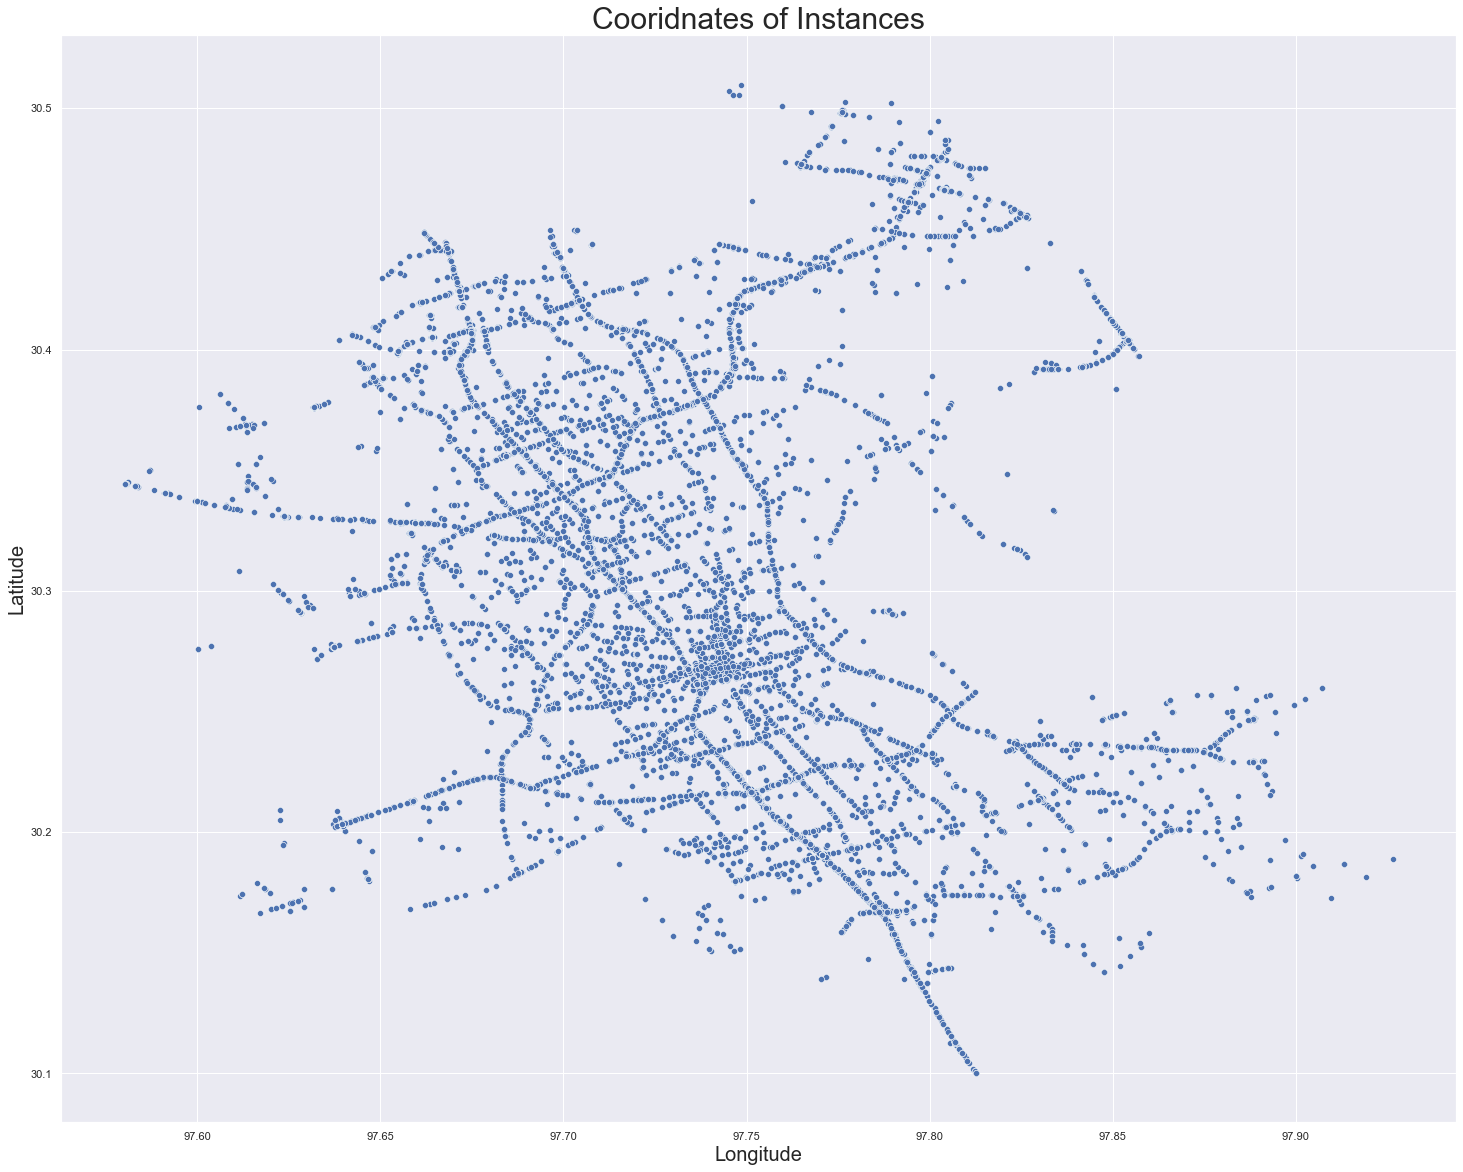

In [28]:
sns.scatterplot(x='Longitude',y='latitude', data=df)
sns.set(rc={'figure.figsize':(25,20)})
plt.xlabel('Longitude',fontsize = 20)
plt.ylabel('Latitude',fontsize = 20)
plt.title('Cooridnates of Instances', fontsize=30)

In [29]:
from numpy.random import seed
import plotly.express as px
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline


In [30]:
crs = {'init': 'epsg:4326'}

In [32]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['latitude'])]
geometry[:3]

In [33]:
geo_df = gpd.GeoDataFrame(df,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


crash_id damage school_zone traffic_amt            roadway  intersection  \
0  18038521    Yes          NO      127485   MAIN/PROPER LANE             0   
1  18042943    Yes          NO      126150   MAIN/PROPER LANE             0   
2  18042943    Yes          NO      126150   MAIN/PROPER LANE             0   
3  18042945     No          NO        None   MAIN/PROPER LANE             0   
4  18042945     No          NO        None   MAIN/PROPER LANE             0   

  daily_traffic   Bridge Detail construction             contributing_factors  \
0        127485  NOT APPLICABLE           No     OTHER (EXPLAIN IN NARRATIVE)   
1        126150  NOT APPLICABLE           No  DRIVER INATTENTION;UNSAFE SPEED   
2        126150  NOT APPLICABLE           No  DRIVER INATTENTION;UNSAFE SPEED   
3          None  NOT APPLICABLE           No     OTHER (EXPLAIN IN NARRATIVE)   
4          None  NOT APPLICABLE           No     OTHER (EXPLAIN IN NARRATIVE)   

   ... veh_defect citation  person_age  person_alcohol  person_drug_test  \
0  ...       None     None          22            None    NOT APPLICABLE   
1  ...       None     None          22            None    NOT APPLICABLE   
2  ...       None     None          35            None    NOT APPLICABLE   
3  ...       None     None         120            None    NOT APPLICABLE   
4  ...       None     None         120            None    NOT APPLICABLE   

   person_ethnicity person_gender person_inj_sev person_type  \
0             BLACK        FEMALE    NOT INJURED      DRIVER   
1             WHITE          MALE    NOT INJURED      DRIVER   
2          HISPANIC          MALE    NOT INJURED      DRIVER   
3           UNKNOWN       UNKNOWN        UNKNOWN     UNKNOWN   
4           UNKNOWN       UNKNOWN        UNKNOWN     UNKNOWN   

                    geometry  
0  POINT (97.66772 30.44443)  
1  POINT (97.71461 30.35357)  
2  POINT (97.71461 30.35357)  
3  POINT (97.72169 30.22705)  
4  POINT (97.72169 30.22705)  

[5 rows x 68 columns]

In [37]:
mapbox_access_token =  'pk.eyJ1IjoidG9tc2hpZWxkczcxIiwiYSI6ImNsNmZycXBwdjBreWQzcG8zejVnYnFiYmQifQ.bNlXf-osSygWPO7Bw0HDmQ'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(geo_df, lat="latitude", lon="Longitude", color ='death_cnt', zoom=8
#                        #mapbox tokens found here https://account.mapbox.com/access-tokens
                      )
fig.show()

In [39]:
mapbox_access_token =  'pk.eyJ1IjoidG9tc2hpZWxkczcxIiwiYSI6ImNsNmZycXBwdjBreWQzcG8zejVnYnFiYmQifQ.bNlXf-osSygWPO7Bw0HDmQ'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(geo_df, lat="latitude", lon="Longitude", color ='unit_injur_cnt', zoom=8
#                        #mapbox tokens found here https://account.mapbox.com/access-tokens
                      )
fig.show()

In [41]:
conda install geoplot -c conda-forge

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::mkl_random==1.2.2=py38hb2f4e1b_0
  - defaults/noarch::jupyter_client==7.0.1=pyhd3eb1b0_0
  - defaults/osx-64::mkl-service==2.4.0=py38h9ed2024_0
  - defaults/osx-64::argon2-cffi==20.1.0=py38h9ed2024_1
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/noarch::urllib3==1.26.7=pyhd3eb1b0_0
  - defaults/osx-64::notebook==6.4.3=py38hecd8cb5_0
  - defaults/osx-64::nbconvert==6.1.0=py38hecd8cb5_0
  - defaults/osx-64::ipykernel==6.4.1=py38hecd8cb5_1
  - defaults/noarch::python-dateutil==2.8.2=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab_server==2.10.2=pyhd3eb1b0_1
  - defaults/noarch::requests==2.26.0=pyhd3eb1b0_0
  - defaults/noarch::bleach==4.0.0=pyhd3eb1b0_0
  - defaults/noarch::jinja2==3.0.1=pyhd3eb1b0_0
  - defaults/noarch::jsonschema==3.2.0=pyhd3eb1b0_2
  

pthread-stubs-0.4    | 6 KB      | ##################################### | 100% 
pyproj-3.3.1         | 438 KB    | ##################################### | 100% 
scipy-1.9.0          | 23.1 MB   | ##################################### | 100% 
joblib-1.1.0         | 210 KB    | ##################################### | 100% 
poppler-data-0.4.11  | 3.6 MB    | ##################################### | 100% 
libgdal-3.5.1        | 9.2 MB    | ##################################### | 100% 
openjpeg-2.4.0       | 374 KB    | ##################################### | 100% 
libgfortran-5.0.0    | 19 KB     | ##################################### | 100% 
xorg-libxdmcp-1.1.3  | 17 KB     | ##################################### | 100% 
libkml-1.3.0         | 483 KB    | ##################################### | 100% 
libxml2-2.9.14       | 680 KB    | ##################################### | 100% 
libgfortran5-9.3.0   | 1.7 MB    | ##################################### | 100% 
geopandas-0.11.1     | 6 KB 

contextily-1.2.0     | 18 KB     | ##################################### | 100% 
fontconfig-2.14.0    | 281 KB    | ##################################### | 100% 
libzlib-1.2.12       | 63 KB     | ##################################### | 100% 
libcurl-7.83.1       | 318 KB    | ##################################### | 100% 
libdap4-3.20.6       | 2.2 MB    | ##################################### | 100% 
proj-9.0.1           | 2.8 MB    | ##################################### | 100% 
munkres-1.1.4        | 12 KB     | ##################################### | 100% 
rtree-1.0.0          | 49 KB     | ##################################### | 100% 
cligj-0.7.2          | 10 KB     | ##################################### | 100% 
geopandas-base-0.11. | 997 KB    | ##################################### | 100% 
fiona-1.8.21         | 930 KB    | ##################################### | 100% 
font-ttf-inconsolata | 94 KB     | ##################################### | 100% 
openssl-3.0.5        | 2.5 M

In [42]:
import geoplot as gplt
import geoplot.crs as gcrs

In [48]:
ax = gplt.kdeplot(
    df.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())

NameError: name 'boroughs' is not defined

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()
df['unit_injur_cnt']=le.fit_transform(df['unit_injur_cnt'])
df.head()

crash_id damage school_zone traffic_amt            roadway  intersection  \
0  18038521    Yes          NO      127485   MAIN/PROPER LANE             0   
1  18042943    Yes          NO      126150   MAIN/PROPER LANE             0   
2  18042943    Yes          NO      126150   MAIN/PROPER LANE             0   
3  18042945     No          NO        None   MAIN/PROPER LANE             0   
4  18042945     No          NO        None   MAIN/PROPER LANE             0   

  daily_traffic   Bridge Detail construction             contributing_factors  \
0        127485  NOT APPLICABLE           No     OTHER (EXPLAIN IN NARRATIVE)   
1        126150  NOT APPLICABLE           No  DRIVER INATTENTION;UNSAFE SPEED   
2        126150  NOT APPLICABLE           No  DRIVER INATTENTION;UNSAFE SPEED   
3          None  NOT APPLICABLE           No     OTHER (EXPLAIN IN NARRATIVE)   
4          None  NOT APPLICABLE           No     OTHER (EXPLAIN IN NARRATIVE)   

   ... veh_defect citation  person_age  person_alcohol  person_drug_test  \
0  ...       None     None          22            None    NOT APPLICABLE   
1  ...       None     None          22            None    NOT APPLICABLE   
2  ...       None     None          35            None    NOT APPLICABLE   
3  ...       None     None         120            None    NOT APPLICABLE   
4  ...       None     None         120            None    NOT APPLICABLE   

   person_ethnicity person_gender person_inj_sev person_type  \
0             BLACK        FEMALE    NOT INJURED      DRIVER   
1             WHITE          MALE    NOT INJURED      DRIVER   
2          HISPANIC          MALE    NOT INJURED      DRIVER   
3           UNKNOWN       UNKNOWN        UNKNOWN     UNKNOWN   
4           UNKNOWN       UNKNOWN        UNKNOWN     UNKNOWN   

                    geometry  
0  POINT (97.66772 30.44443)  
1  POINT (97.71461 30.35357)  
2  POINT (97.71461 30.35357)  
3  POINT (97.72169 30.22705)  
4  POINT (97.72169 30.22705)  

[5 rows x 68 columns]